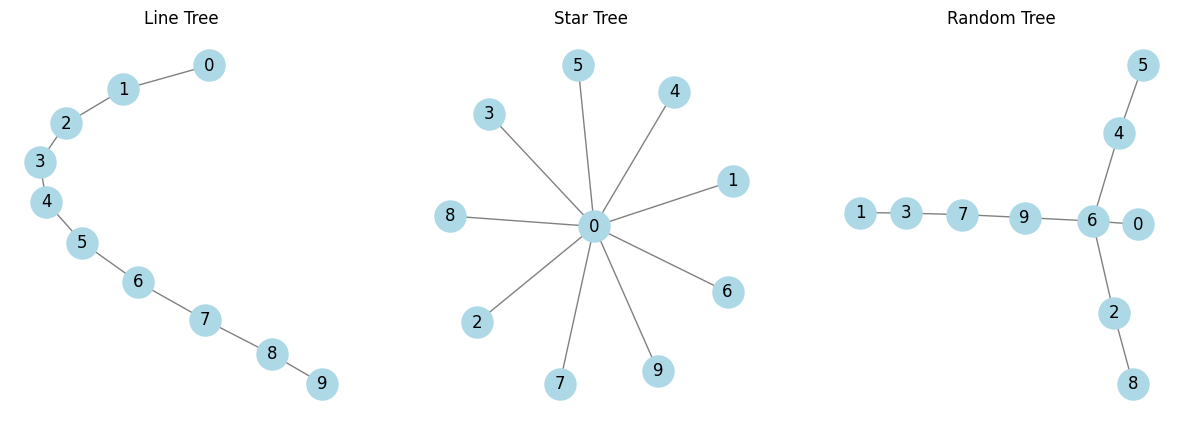

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Number of nodes
n = 10


# Generate a random tree using the Prüfer sequence approach
def generate_random_tree(num_nodes, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # Generate a Prüfer sequence of length (num_nodes - 2)
    prufer_sequence = np.random.randint(0, num_nodes, size=(num_nodes - 2))
    # Initialize degree of each node to 1
    degree = [1] * num_nodes
    for node in prufer_sequence:
        degree[node] += 1
    # Initialize the tree's edges
    edges = []
    for node in prufer_sequence:
        for i in range(len(degree)):
            if degree[i] == 1:  # Find the first leaf node
                edges.append((i, node))
                degree[i] -= 1
                degree[node] -= 1
                break
    # Add the final edge
    u, v = [i for i in range(len(degree)) if degree[i] == 1]
    edges.append((u, v))
    return nx.Graph(edges)


# Generate three types of trees
line_tree = nx.path_graph(n)  # Line/tree path
star_tree = nx.star_graph(n - 1)  # Center node 0, all others connect to it
random_tree = generate_random_tree(n, seed=42)  # Random tree


# Function to draw trees side-by-side
def draw_trees(trees, titles):
    fig, axes = plt.subplots(1, len(trees), figsize=(15, 5))
    for ax, tree, title in zip(axes, trees, titles):
        pos = nx.spring_layout(tree, seed=42)  # Use spring layout for consistency
        nx.draw(tree, pos, with_labels=True, ax=ax, node_color="lightblue", edge_color="gray", node_size=500)
        ax.set_title(title)
    plt.show()


# Draw the trees
draw_trees([line_tree, star_tree, random_tree], ["Line Tree", "Star Tree", "Random Tree"])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Settings
n_max = 300
k_bar = 1.2

for n in range(10, n_max, 10):
    m = int((k_bar * n) / 2)
    G = nx.gnm_random_graph(n, m)

    # Get the size of the largest component
    largest_cc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_cc)

    # Plot largest component only
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G_sub)
    nx.draw(G_sub, pos, node_color='lightblue', with_labels=False, node_size=30)
    plt.title(f'n = {n}, k̄ = {k_bar}, giant component size = {len(G_sub)}')
    plt.axis('off')
    plt.show()




#

/tmp/ipykernel_34955/2277697168.py:9: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  S_solution, = fsolve(func, S_guess)


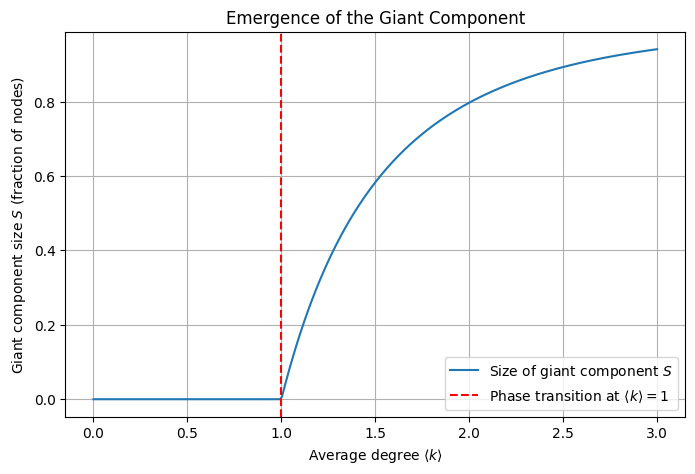

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def giant_component_size(k):
    # Solve S = 1 - exp(-k * S)
    func = lambda S: S - (1 - np.exp(-k * S))
    S_guess = 0.0001 if k < 1 else 0.5
    S_solution, = fsolve(func, S_guess)
    return S_solution

k_vals = np.linspace(0, 3, 300)
S_vals = [giant_component_size(k) for k in k_vals]

plt.figure(figsize=(8, 5))
plt.plot(k_vals, S_vals, label='Size of giant component $S$')
plt.axvline(1, color='red', linestyle='--', label='Phase transition at $\\langle k \\rangle = 1$')
plt.xlabel('Average degree $\\langle k \\rangle$')
plt.ylabel('Giant component size $S$ (fraction of nodes)')
plt.title('Emergence of the Giant Component')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display

# Function to solve S = 1 - exp(-k * S)
def giant_component_size(k):
    if k <= 0:
        return 0.0
    func = lambda S: S - (1 - np.exp(-k * S))
    S_guess = 0.0001 if k < 1 else 0.5
    S_solution, = fsolve(func, S_guess)
    return S_solution

# Function to update the graph
def update_graph(n=100, k_bar=0.5):
    m = int(k_bar * n / 2)
    G = nx.gnm_random_graph(n, m)

    # Theoretical giant component size
    S_theory = giant_component_size(k_bar)
    theoretical_size = int(S_theory * n)

    # Actual largest component
    if nx.is_connected(G):
        largest_cc_nodes = list(G.nodes())
    else:
        largest_cc_nodes = max(nx.connected_components(G), key=len)

    largest_cc = G.subgraph(largest_cc_nodes)

    # Plotting
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G, seed=42)
    node_colors = ['red' if node in largest_cc_nodes else 'lightgray' for node in G.nodes()]
    nx.draw(G, pos, node_color=node_colors, node_size=40, with_labels=False, edge_color='gray')
    plt.title(f'n = {n}, k_bar = {k_bar:.2f}\nGiant component size = {len(largest_cc)} (theory: ~{theoretical_size})')
    plt.axis('off')
    plt.show()

# Widgets
n_slider = widgets.IntSlider(value=100, min=20, max=500, step=10, description='Nodes (n):')
k_slider = widgets.FloatSlider(value=0.5, min=0.0, max=3.0, step=0.05, description='Avg. Degree (k̄):')

# Interactive output
widgets.interact(update_graph, n=n_slider, k_bar=k_slider)


interactive(children=(IntSlider(value=100, description='Nodes (n):', max=500, min=20, step=10), FloatSlider(va…

<function __main__.update_graph(n=100, k_bar=0.5)>